Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Batsal Ghimire"
COLLABORATORS = ""

---

# CS110 Pre-class Work 11.1

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length n of a rodand a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1. 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [2]:
def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Inputs;:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - q: float, the optimal revenue
    """
    if n == 0: #If the length of the rod is 0, then return 0
        return 0
    q = -float('inf') #Set the initial value of q to the least possible value to not interfere with the finding the max.
    for i in range (n):
        q = max(q, p[i]+cut_rod(p, n-i-1)) #Recursive function to find the max of all the combinations of cuts.
    return q

In [3]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2.

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [4]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - r: list of floats, the maximum revenues. r[i] gives the maximum revenue for a rod
    of length i. As such:
        * r[0] = 0
        * len(r) == n + 1
    - s: list of ints, the optimal sizes of the first piece to cut off. Also make sure 
    that:
        * s[0] = 0
        * len(s) == n + 1
    """
    #Create two lists will all ones.
    r = [0 for i in range(n+1)] 
    s = [0 for i in range(n+1)]
    for j in range (1,n+1):
        q = -float('inf')
        for i in range (j):
            if q<p[i]+r[j-i-1]:
                q = p[i] + r[j-i-1]
                s[j] = i+1
        r[j] = q
    return r, s    

In [5]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the revenue (in USD, for example) the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - sol: a list of ints, indicating how to cut the rod. Cutting the rod with the lengths
    given in sol gives the optimal revenue.
        * print_cut_rod_solution(p,0) == []
    """
    r,s = extended_bottom_up_cut_rod(p,n)
    while n>0:
        print (s[n])
        n = n-s[n]
        
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
extended_bottom_up_cut_rod(p,10)

([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30], [0, 1, 2, 3, 2, 2, 6, 1, 2, 3, 10])

In [6]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1.

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for parts 2 and 3 below.


In [7]:
import numpy as np
def generate_price_list(n):
    """Generates a price list of length n
    
    Inputs:
    - n: integer, length of the list, must be positive
    
    Outputs:
    - p: list, the ordered price list for each rod cut
    """
    p = [1]
    for i in range(1,n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p


In [8]:
p = generate_price_list(20)

## Question 2.

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


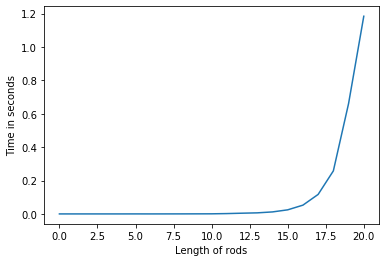

[0.0, 0.0, 0.0, 0.0, 0.0, 0.00010325908660888672, 0.0, 9.963512420654296e-05, 0.0001959562301635742, 0.0004024982452392578, 0.0005983829498291016, 0.001995229721069336, 0.004288029670715332, 0.006379175186157227, 0.011968255043029785, 0.024438118934631346, 0.052455782890319824, 0.11668782234191895, 0.25751428604125975, 0.6605334281921387, 1.18362295627594]


In [12]:
import matplotlib.pyplot as plt
import time
trials = 10
len_list = 20
lis_tm = []
for n in range(len_list+1):
    tm = 0
    for trial in range(trials):
        begin_tm = time.time()
        cut_rod(p,n)
        tm +=  time.time() - begin_tm
    lis_tm.append(tm/trials)

#Plotting the relation
plt.xlabel("Length of rods")
plt.ylabel("Time in seconds")
plt.plot([k for k in range(len_list+1)], lis_tm)
plt.show()
print (lis_tm)

## Question 3.

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

[9.970664978027343e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.975433349609374e-05, 0.0, 0.0, 0.0, 9.97304916381836e-05, 0.0, 0.0, 9.975433349609374e-05, 0.0001995563507080078]


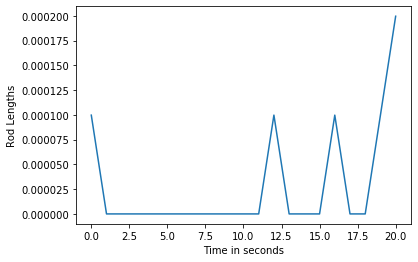

In [15]:
trials = 10
len_list = 20
lis_tm = []
for n in range(len_list+1):
    tm = 0
    for trial in range(trials):
        begin_tm = time.time()
        extended_bottom_up_cut_rod(p,n)
        tm +=  time.time() - begin_tm
    lis_tm.append(tm/trials)
print (lis_tm)
#Plotting the relation
plt.xlabel("Time in seconds")
plt.ylabel("Rod Lengths")
plt.plot([k for k in range(len_list+1)], lis_tm)
plt.show()

## Question 4.

Contrast both curves. What can you conclude?

We can see from the graph that, for the recursive approach, as 'n' increases the time taken also grows exponentially. From n=15, the graph grew rapidly and the time taken was greater than a second for n=20. On the other hand, for the extended function, the time taken was less than a very small fraction of a second. This shows the second way is much more quicker than the first one.

The results follow from the theoretical explanation, since the time complexity for the first approach was $O(2^n)$, which we see from the graph as well. For the second one, the time module rounded up smaller numbers to 0. But, we should see a graph to look like the function of $n^2$ as the length increases

## Part C - After completing your experiments above, answer the following questions:

## Question 1.
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

I printed out the times from the first graph, and the time taken when n=20 is 0.8112792253494263, which we can round off to 0.81. The time complexity for the approach is $O(2^n)$, but there should be a constant present for the actual function  i.e. $k.2^n$.
$$0.81 = k \times 2^20$$
$$ k = 7.72 \times 10^{-7}$$

So, we can convert million years to seconds which is: $3.15 \times 10^{13}$ seconds.

So,

$3.15 \times 10^{13} = 7.72 \times 10^{-7} \times 2^n$

$2^n = 4.08 \times 10^{19}$

$ n = log_2(4.08 \times 10^{19})$

$ n = 65.14 $

So, the length should be around 65 for the first function to take a million years to run it.

## Question 2.
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

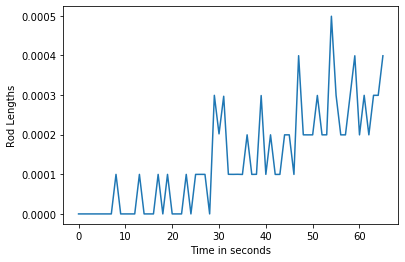

In [16]:
trials = 10
len_list = 65
lis_tm = []
p = []
for i in range(len_list):
    p.append(i)
for n in range(len_list+1):
    tm = 0
    for trial in range(trials):
        begin_tm = time.time()
        extended_bottom_up_cut_rod(p,n)
        tm +=  time.time() - begin_tm
    lis_tm.append(tm/trials)
#Plotting the relation
plt.xlabel("Time in seconds")
plt.ylabel("Rod Lengths")
plt.plot([k for k in range(len_list+1)], lis_tm)
plt.show()

The estimated time was 0.0003 seconds.

## [Optional]  Question 3. 
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE